In [2]:
import sys

sys.path.append('..')

In [43]:
import io
from pathlib import Path

import numpy as np
import pytesseract
from ipywidgets import interact
from PIL import Image, ImageDraw, ImageOps
from skimage import feature, filters, morphology, restoration, util

In [9]:
DATA_DIR = Path('..') / 'data'
LABELS_DIR = DATA_DIR / 'labels-1' / 'typewritten'
# LABELS_DIR = DATA_DIR / 'labels' / 'handwritten'

In [160]:
IMAGES = sorted(LABELS_DIR.glob('*.jpg'))

IDX = 3240   # A target image with plenty of underlines
# IDX = 46    # Lots of odd colors
# IDX = 2880  # Underlines
# IDX = 2939  # Rotated

In [161]:
def raw_image(idx):
    path = IMAGES[idx]
    print(path)
    image = PImage.open(path)
    display(image)


# raw_image(IDX)
# interact(raw_image, idx=(0, len(IMAGES) - 1))

913
(1376, 1019)
3240
../data/labels-1/typewritten/11782823.jpg
oo + ow ee ge eee,

ee ye ee

PLANTS OF ARKANSAS

Family. GRAMINEAR.

Genus Penicum
| Species aa tantnsnsecersceerncnses
| Common or Local Names....... ... ...
\
LocalityRast..o£ Sherry..Valloye.j seoeeed CaS ge County
Habitat.............
Light... ...Wixposule... - Alt...
Soil—Colo1... .. Texture ..... pHi...........

Collected by D M MOORE Date... Nay Oat
Qn
Identified by » « No. : 232,


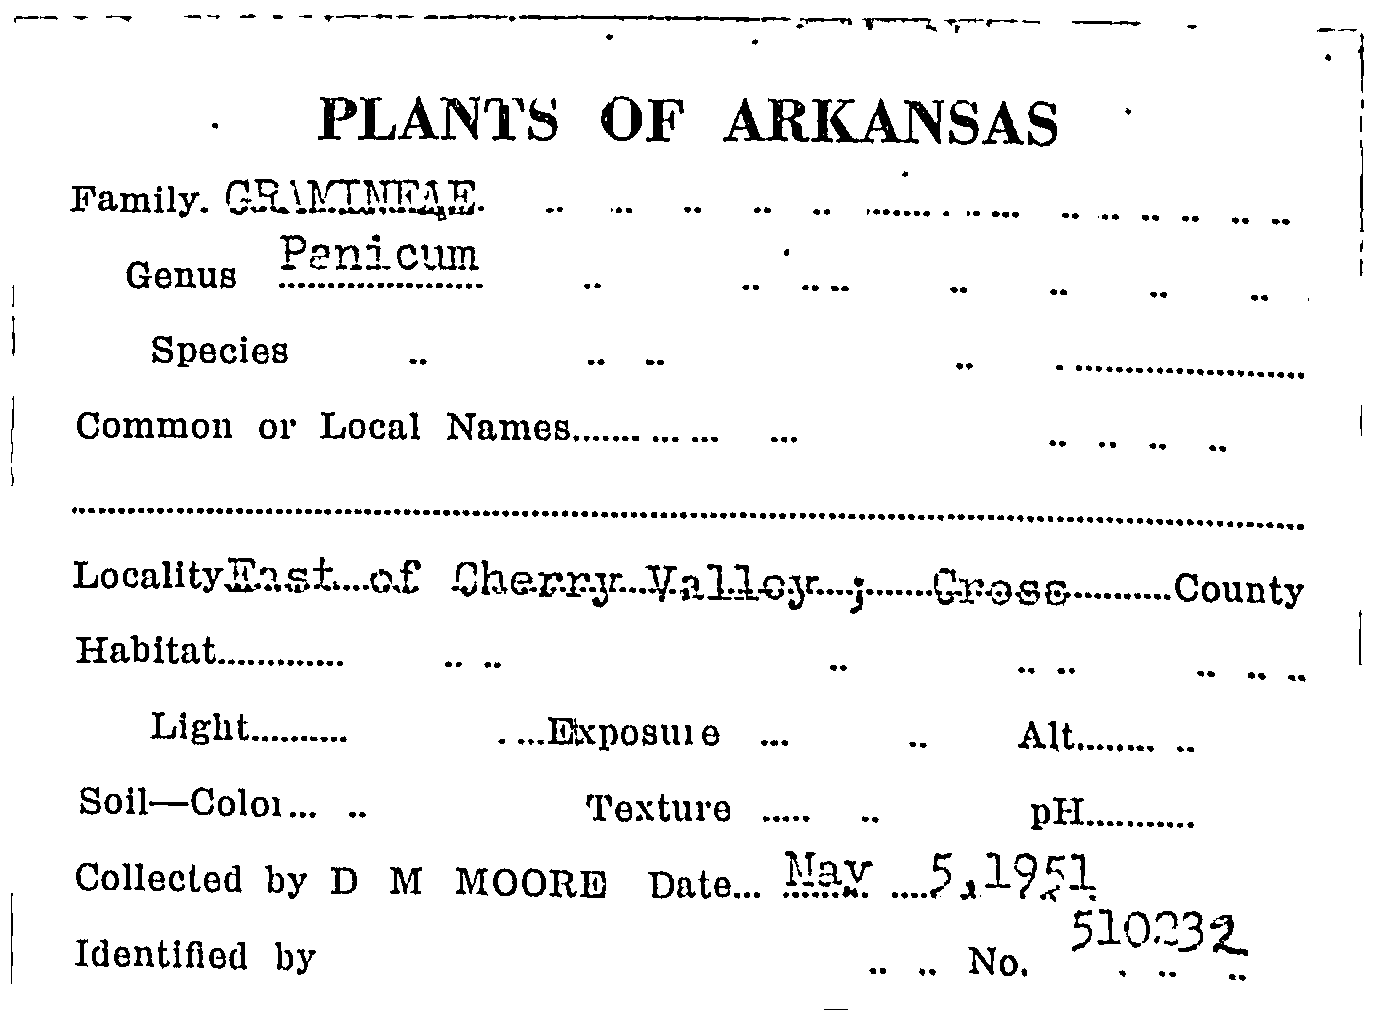

In [172]:
BLOCK_SIZE = 11
OFFSET = 11

thresh = 16

def scikit_image(idx):
    path = IMAGES[idx]

    image = PImage.open(path).convert('L')
    data = np.array(image)

    threshold = filters.threshold_sauvola(data, window_size=OFFSET, k=0.032)
    binary = data > threshold

    cleaned = morphology.remove_small_holes(binary, area_threshold=24)

    new = Image.fromarray(cleaned).convert('RGB')
    draw = ImageDraw.Draw(new)

    boxes = pytesseract.image_to_boxes(new)
    boxes = boxes.splitlines()
    w, height = new.size
    print(len(boxes))
    print(new.size)
    for box in boxes:
        if box:
            char, *coords = box.split()[:-1]
            left, bottom, right, top = [int(c) for c in coords]
            top, bottom = height - top, height - bottom
            w = right - left
            h = bottom - top
            if w > thresh or h > thresh:
                # draw.rectangle((left, top, right, bottom), outline='red')
                pass
            else:
                draw.rectangle(
                    (left, top, right, bottom), 
                    outline='white',
                    fill='white')

    text = pytesseract.image_to_string(new)
    text = text.strip()

    print(idx)
    print(path)
    print(text)

    display(new)


scikit_image(IDX)
# interact(scikit_image, idx=(0, len(IMAGES) - 1))